# Preprocessing

In [2]:
import pandas as pd

dataset=pd.read_csv(r"C:\Users\ASUS\Downloads\titanic-passengers.csv", sep=";")
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


# Training set and Testing set

In [3]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

# Decision tree

In [4]:
dtree=tree.DecisionTreeClassifier(criterion = "gini",splitter= 'random', max_leaf_nodes=10, min_samples_leaf=5, max_depth=5)
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8044692737430168


# Plot decision tree

Matplotlib is building the font cache; this may take a moment.


[Text(708.2307692307693, 996.6, 'Sex <= 0.944\ngini = 0.469\nsamples = 100.0%\nvalue = [0.624, 0.376]'),
 Text(257.53846153846155, 815.4000000000001, 'Pclass <= 2.615\ngini = 0.39\nsamples = 35.4%\nvalue = [0.266, 0.734]'),
 Text(128.76923076923077, 634.2, 'gini = 0.1\nsamples = 18.7%\nvalue = [0.053, 0.947]'),
 Text(386.3076923076923, 634.2, 'Fare <= 28.621\ngini = 0.5\nsamples = 16.7%\nvalue = [0.504, 0.496]'),
 Text(257.53846153846155, 453.0, 'Parch <= 0.616\ngini = 0.494\nsamples = 14.5%\nvalue = [0.447, 0.553]'),
 Text(128.76923076923077, 271.79999999999995, 'gini = 0.476\nsamples = 9.7%\nvalue = [0.391, 0.609]'),
 Text(386.3076923076923, 271.79999999999995, 'gini = 0.493\nsamples = 4.8%\nvalue = [0.559, 0.441]'),
 Text(515.0769230769231, 453.0, 'gini = 0.219\nsamples = 2.2%\nvalue = [0.875, 0.125]'),
 Text(1158.923076923077, 815.4000000000001, 'Age <= 6.885\ngini = 0.296\nsamples = 64.6%\nvalue = [0.82, 0.18]'),
 Text(901.3846153846155, 634.2, 'SibSp <= 3.53\ngini = 0.484\nsample

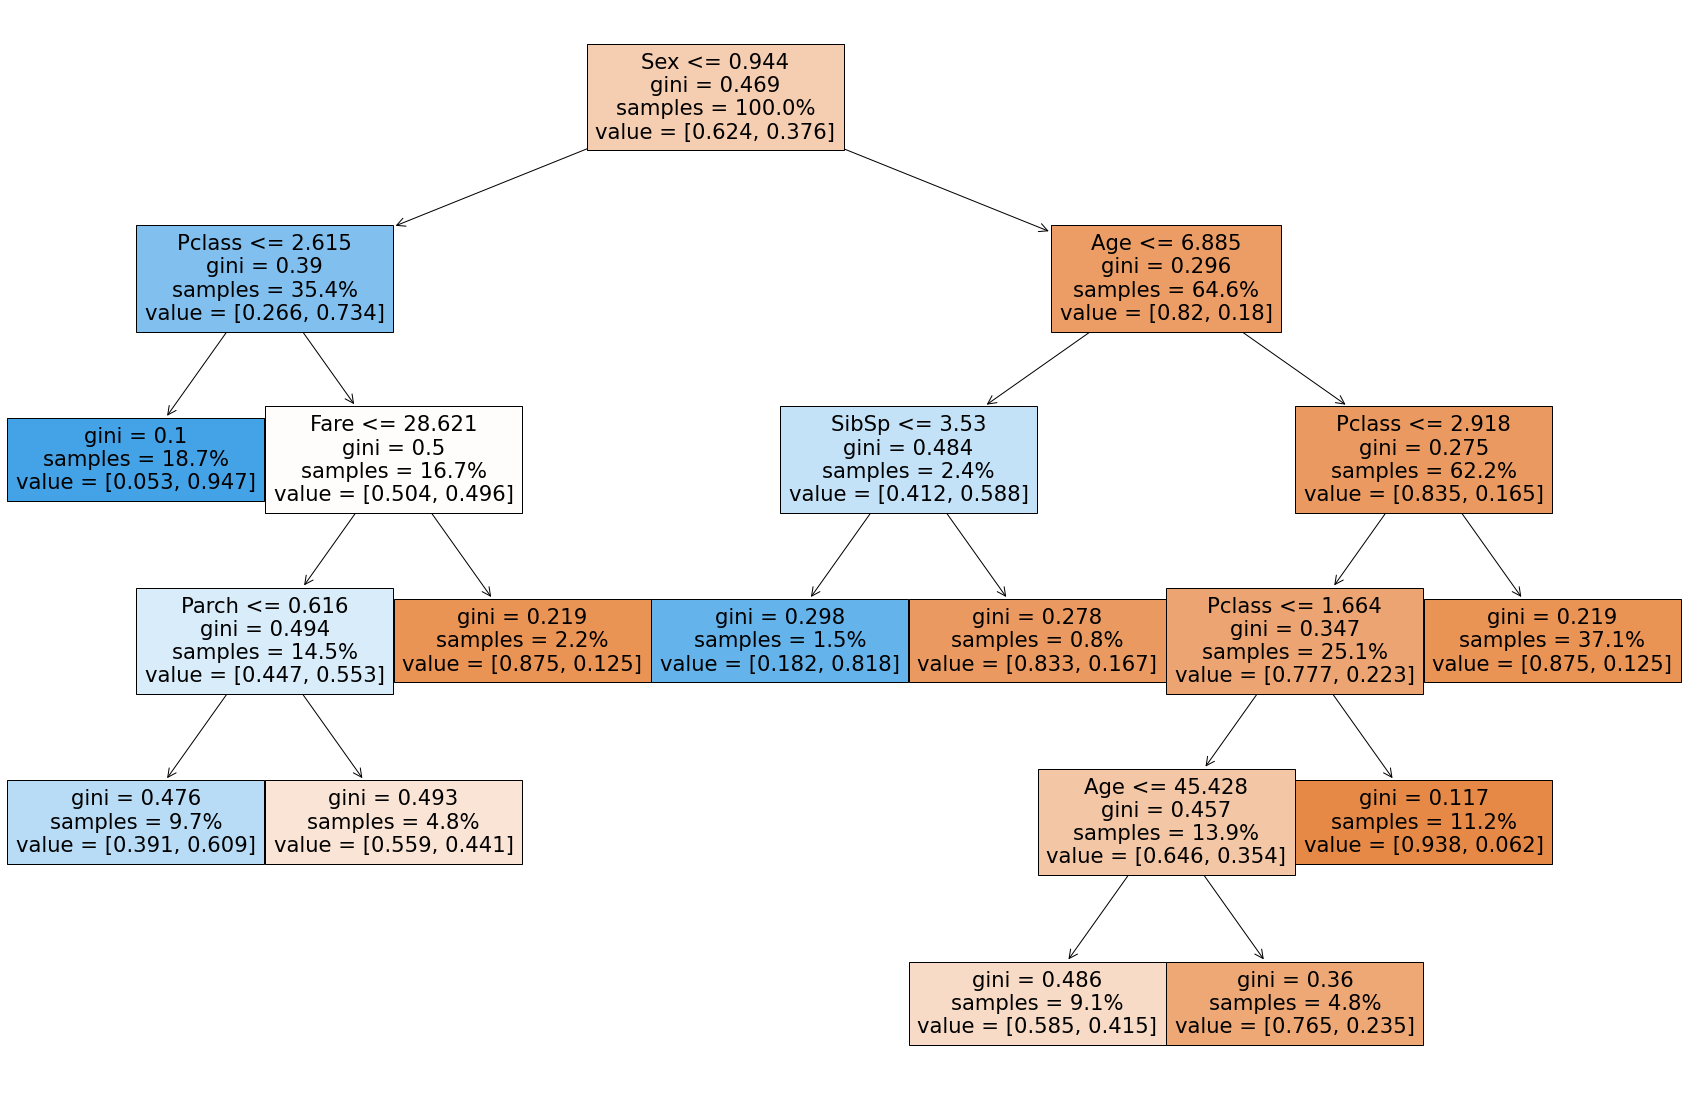

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (30,20))
plot_tree(dtree, filled = True, feature_names = x.columns, proportion = True)

# Change the decision tree parameters

In [6]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked","Age","Sex"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

dtree=tree.DecisionTreeClassifier(criterion = "gini",splitter= 'random', max_leaf_nodes=8, min_samples_leaf=10, max_depth=7)
dtree.fit(x_train, y_train)   #fitting our model
y_pred=dtree.predict(x_test)   # evaluating our model

# New accuracy

In [7]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7430167597765364


#the accuracy in the second exemple is less than the first one

# Random forest

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
X=data[['PassengerId', 'Pclass', 'Sex','Age','SibSp','Parch','Fare']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%

In [9]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8619402985074627


# Change the number of estimators

In [10]:
clf=RandomForestClassifier(n_estimators=20) 
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8432835820895522


#the accuracy in the second example is more than the first one